**Operations Research in Action &#x25aa; Fall 2024**

# Project 2 &ndash; Exploratory Data Analysis

Before we begin modeling, we need to understand the data that we have, conduct an exploratory analysis to understand the underlying relationships, and if necessary, wrangle the data into the right form for modeling.

## Import the data 

In the same folder as this notebook, there are three data sets, `data/player_data.csv`, `data/stint_data_wide.csv`, and `data/stint_data_long.csv`. Import each data set into a Pandas DataFrame. 

In [1]:
# Solution
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

player_df = pd.read_csv('data/player_data.csv')
stint_wide_df = pd.read_csv('data/stint_data_wide.csv')
stint_long_df = pd.read_csv('data/stint_data_long.csv')

## Describe the data

Recall that the data section of your report should describe each data set. For tabular data, this includes the size of the data, as well as what each row and column represents. The data section also should report basic summary statistics for key variables of interest. 

Examine the three data sets you imported above. How big is the data set? What does each row represent? For each row, what information does the data set contain? Compute basic summary statistics (e.g., mean, standard deviation, minimum, maximum) for some key variables of interest.

In [2]:
# Solution
player_df.head()

,player,rating
0,USA_p1,3.0
1,USA_p2,3.0
2,USA_p3,3.5
3,USA_p4,0.0
4,USA_p5,2.0


In [3]:
# Solution
player_df.describe()

,rating
count,144.000000
mean,1.979167
std,1.010219
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,3.500000


In [4]:
# Solution
stint_wide_df.head()

,game_id,stint_id,h_team,a_team,minutes,h_goals,a_goals,USA_p1,USA_p2,USA_p3,...,Chile_p3,Chile_p4,Chile_p5,Chile_p6,Chile_p7,Chile_p8,Chile_p9,Chile_p10,Chile_p11,Chile_p12
0,1,1,USA,Japan,4.252969,4,9,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,2,USA,Japan,5.688809,6,11,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,USA,Japan,1.149557,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,4,USA,Japan,3.511617,7,5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,5,USA,Japan,2.163139,7,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Solution
stint_wide_df[['minutes', 'h_goals', 'a_goals']].describe()

,minutes,h_goals,a_goals
count,7448.000000,7448.000000,7448.000000
mean,2.843314,4.494898,4.253088
std,1.631194,3.548051,3.411053
min,0.001582,0.000000,0.000000
25%,1.622875,2.000000,2.000000
50%,2.582959,4.000000,3.000000
75%,3.765502,6.000000,6.000000
max,8.000000,24.000000,23.000000


In [6]:
# Solution
stint_long_df.head()

,game_id,stint_id,h_team,a_team,minutes,h_goals,a_goals,player,player_home_away
0,1,1,USA,Japan,4.252969,4,9,USA_p1,1
1,1,1,USA,Japan,4.252969,4,9,USA_p3,1
2,1,1,USA,Japan,4.252969,4,9,USA_p4,1
3,1,1,USA,Japan,4.252969,4,9,USA_p6,1
4,1,1,USA,Japan,4.252969,4,9,Japan_p4,-1


In [7]:
# Solution
stint_long_df[['minutes', 'h_goals', 'a_goals']].describe()

,minutes,h_goals,a_goals
count,59584.000000,59584.000000,59584.000000
mean,2.843314,4.494898,4.253088
std,1.631098,3.547843,3.410852
min,0.001582,0.000000,0.000000
25%,1.622875,2.000000,2.000000
50%,2.582959,4.000000,3.000000
75%,3.765502,6.000000,6.000000
max,8.000000,24.000000,23.000000


## Data wrangling

Recall that Ming wants to assign a value to each player based on plus-minus, a primitive performance measure based on stints. As the case describes, the plus-minus for each stint is

$$
\text{PM}_{\text{stint}} = \frac{\text{HomeGoals}_{\text{stint}} - \text{AwayGoals}_{\text{stint}}}{\text{Duration}_{\text{stint}}}
$$

Wrangle the data to compute the plus-minus for each stint.

In [8]:
# Solution
stint_wide_df['pm'] = (stint_wide_df['h_goals'] - stint_wide_df['a_goals']) / stint_wide_df['minutes']

We could do something similar to compute a plus-minus for each player:

$$
\text{PM}_{\text{player}} = \frac{\displaystyle\sum_{\text{stint: player plays during stint}} (\text{HomeGoals}_{\text{stint}} - \text{AwayGoals}_{\text{stint}})}{\displaystyle\sum_{\text{stint: player plays during stint}} \text{Duration}_{\text{stint}}} 
$$

In [9]:
# Solution
player_game_df = (
    stint_long_df
    .groupby('player')
    .agg(
        minutes=('minutes', 'sum'),
        h_goals=('h_goals', 'sum'),
        a_goals=('a_goals', 'sum')
    )
    .reset_index()
)

player_game_df['player_pm'] = (player_game_df['h_goals'] - player_game_df['a_goals']) / player_game_df['minutes']

In [10]:
# Solution
player_all_df = player_df.merge(player_game_df, on='player', how='left')
player_all_df.head()

,player,rating,minutes,h_goals,a_goals,player_pm
0,USA_p1,3.0,1155.774143,1769,1767,0.001730
1,USA_p2,3.0,1067.953325,1686,1579,0.100192
2,USA_p3,3.5,888.478357,1348,1389,-0.046146
3,USA_p4,0.0,1421.401843,2280,2138,0.099901
4,USA_p5,2.0,1039.289768,1661,1483,0.171271


## Exploratory data analysis

Exploratory data analysis helps us uncover patterns and identify the underlying relationships in the data.
Ultimately, our goal is to produce analysis and visualizations that provide insight into our formal modeling process (e.g., regression, optimization, simulation).

What insights can you gather about the stint plus-minus ratings? What about the player plus-minus ratings?

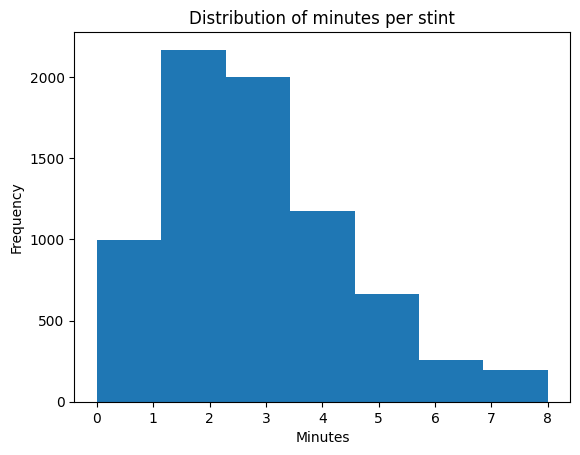

In [11]:
# Solution
bins = np.linspace(0, 8, 8)
plt.hist(stint_wide_df['minutes'], bins)
plt.title('Distribution of minutes per stint')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.show()

In [12]:
# Solution
stint_wide_df['pm'].describe()

count    7448.000000
mean        0.091035
std         1.559537
min       -30.972995
25%        -0.790877
50%         0.000000
75%         0.950508
max        31.234842
Name: pm, dtype: float64

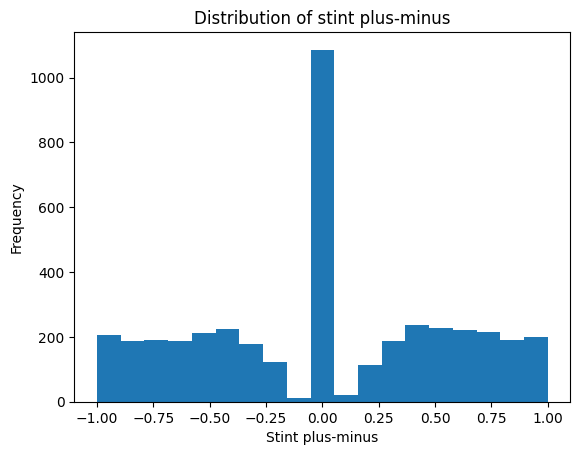

In [13]:
# Solution
bins = np.linspace(-1, 1, 20)
plt.hist(stint_wide_df['pm'], bins)
plt.title('Distribution of stint plus-minus')
plt.xlabel('Stint plus-minus')
plt.ylabel('Frequency')
plt.show()

In [14]:
# Solution
player_game_df['player_pm'].describe()

count    144.000000
mean       0.083440
std        0.057011
min       -0.073543
25%        0.048260
50%        0.091100
75%        0.121610
max        0.224428
Name: player_pm, dtype: float64

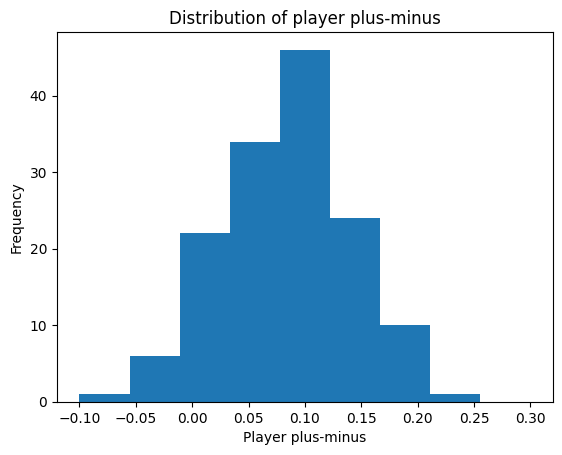

In [15]:
# Solution
bins = np.linspace(-0.1, 0.3, 10)
plt.hist(player_game_df['player_pm'], bins)
plt.title('Distribution of player plus-minus')
plt.xlabel('Player plus-minus')
plt.ylabel('Frequency')
plt.show()

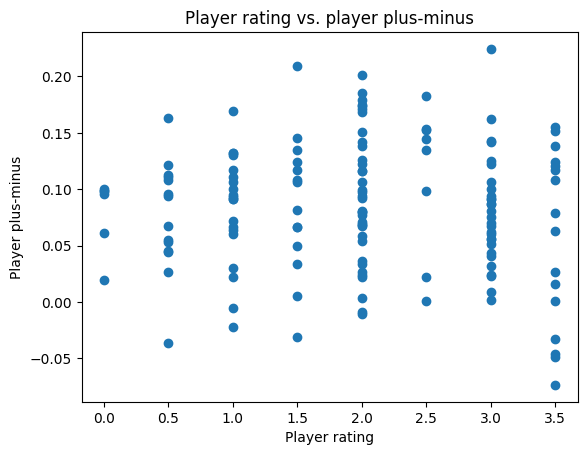

In [16]:
# Solution
plt.scatter(player_all_df['rating'], player_all_df['player_pm'])
plt.title('Player rating vs. player plus-minus')
plt.xlabel('Player rating')
plt.ylabel('Player plus-minus')
plt.show()